# Univariate Time Series Forecasting Demonstration (Sales Datasets)--LSTM  -- KERAS Time Series Generator 

**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**--------------------------------------------------------------------------------------------------------------------------**
**---------------------------------------------------**


**Overview**

*In this Python ML tutorial, the use of the  LSTM model, when applied to a simple sales Univariate Time Series dataset for forecasting purposes, is demonstrated. The project is broken down into the following stages: i) Importing the Sales Dataset, ii) Dataframe Creation, iii) Data Preprocessing & Exploratory Data Analysis (EDA), iv) Input-Target Sequence Creation for Supervised Learning, v) ML Model Training & vi) ML Model Predictions.*

*There are two examples presented in this project. In the first example, the dataset is split into train /test samples and once the LSTM is trained, its performance is evaluated by comparing its predictions against  the target test set values. In the second example, the training set comprises all dataset samples and the goal is to forecast the future values over a defined prediction horizon.*




**The Dataset (.csv file format) for this project has been obtained from Kaggle:**

"*Time Series Forecasting*" -- File: "BeerWineLiquor.csv" -- Source:https://www.kaggle.com/bulentsiyah/for-simple-exercises-time-series-forecasting?select=BeerWineLiquor.csv



In [244]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [245]:
# Importing the Beer Sales Dataset as pandas dataframe

dataset=pd.read_csv('BeerWineLiquor.csv')

In [246]:
# Column renaming
dataset.rename(columns={'beer':'Beer_Sales'},inplace=True)
dataset.rename(columns={'date':'DATE'},inplace=True)
dataset.head(5)

,DATE,Beer_Sales
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [247]:
# Dataset tail
dataset.tail()

,DATE,Beer_Sales
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [248]:
# Dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   DATE        324 non-null    object
 1   Beer_Sales  324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [249]:
# 'DATE' column is converted from 'object' data type to 'datetime' 
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
# Feature Engineering is applied to extract the Months and Years from the 'DATE' column
dataset['Year'] = dataset['DATE'].apply(lambda date:date.year)
dataset['Month'] = dataset['DATE'].apply(lambda date:date.month)
dataset.head(2)

,DATE,Beer_Sales,Year,Month
0,1992-01-01,1509,1992,1
1,1992-02-01,1541,1992,2


In [250]:
# 'DATE' column is set as dataset index
dataset=dataset.set_index(['DATE'])
dataset.head(2)


,Beer_Sales,Year,Month
DATE,,,
1992-01-01,1509,1992,1
1992-02-01,1541,1992,2


In [251]:
# 'Year' & 'Month' are the extracted columns from 'DATE'
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1992-01-01 to 2018-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Beer_Sales  324 non-null    int64
 1   Year        324 non-null    int64
 2   Month       324 non-null    int64
dtypes: int64(3)
memory usage: 10.1 KB


In [252]:
# Mapping to rename the entries of the 'Month' column
num_to_name={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
                                  6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
dataset['Month'] = dataset['Month'].map(num_to_name)
dataset.head(2)

,Beer_Sales,Year,Month
DATE,,,
1992-01-01,1509,1992,Jan
1992-02-01,1541,1992,Feb


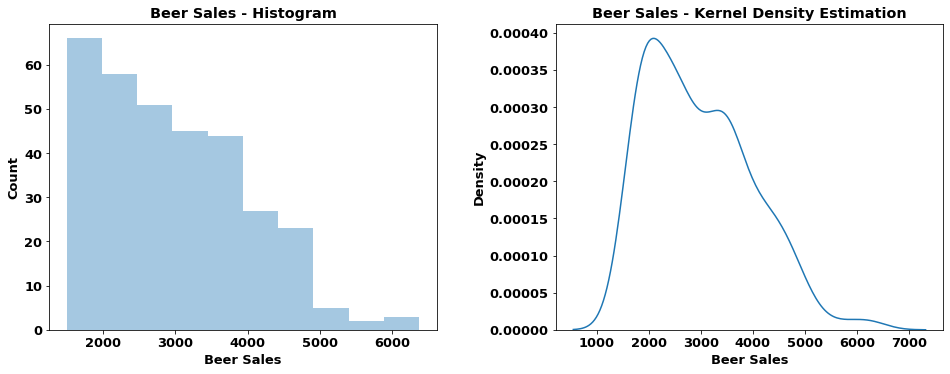

In [253]:
# Sales histogram and kernel density estimation plots
fig,axs=plt.subplots(1,2,figsize=(14,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12

sns.distplot(dataset['Beer_Sales'],kde=False,bins=10,ax=axs[0])
axs[0].set_title('Beer Sales - Histogram',fontweight='bold')
axs[0].set_xlabel('Beer Sales',fontweight='bold')
axs[0].set_ylabel('Count',fontweight='bold')

sns.distplot(dataset['Beer_Sales'],kde=True,hist=False,ax=axs[1])
axs[1].set_title('Beer Sales - Kernel Density Estimation',fontweight='bold')
axs[1].set_xlabel('Beer Sales',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold')


for ax in axs.flat:
    
    ax.figure.tight_layout(pad=3);


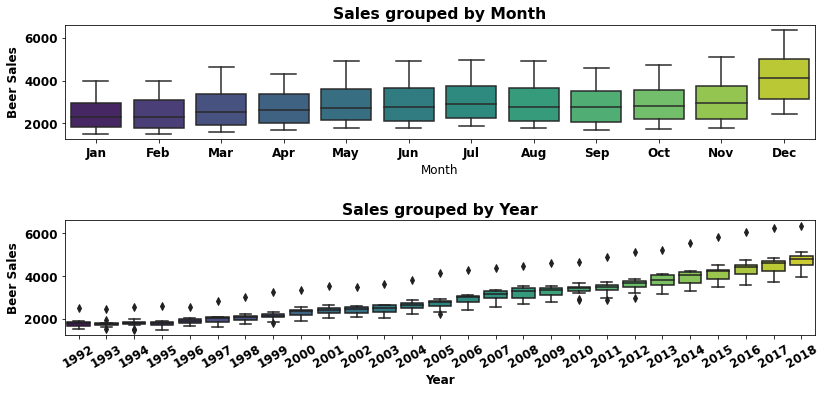

In [254]:
# Boxplots of Beer sales grouped by Month and Year. Based on the 'Months' boxplot, it can be observed that
# for both Beer and Alcohol sales, December has been the month with the highest sales (median value), whereas January the 
# month with the lowest sales (median value). In general, the total number of Beer and Alcohol sales increases over the years.
fig,axs=plt.subplots(2,1,figsize=(12,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13


sns.boxplot(x='Month',data=dataset,y='Beer_Sales',palette='viridis',ax=axs[0])
axs[0].set_ylabel('Beer Sales',fontweight='bold')
axs[0].set_title('Sales grouped by Month',fontweight='bold')
sns.boxplot(ax=axs[1],x='Year',data=dataset,y='Beer_Sales',palette='viridis')
axs[1].set_xlabel('Year',fontweight='bold')
axs[1].set_ylabel('Beer Sales',fontweight='bold')
axs[1].set_title('Sales grouped by Year',fontweight='bold')

plt.setp(axs[1].get_xticklabels(), rotation=30)
for ax in axs.flat:
   
    ax.figure.tight_layout(pad=2)

In [255]:
# Dropping the 'Year', 'Month' columns
data=dataset.drop(['Year','Month'],axis=1)
data.head()

,Beer_Sales
DATE,
1992-01-01,1509
1992-02-01,1541
1992-03-01,1597
1992-04-01,1675
1992-05-01,1822


Text(0.5, 1.0, 'Beer Sales Time Series')

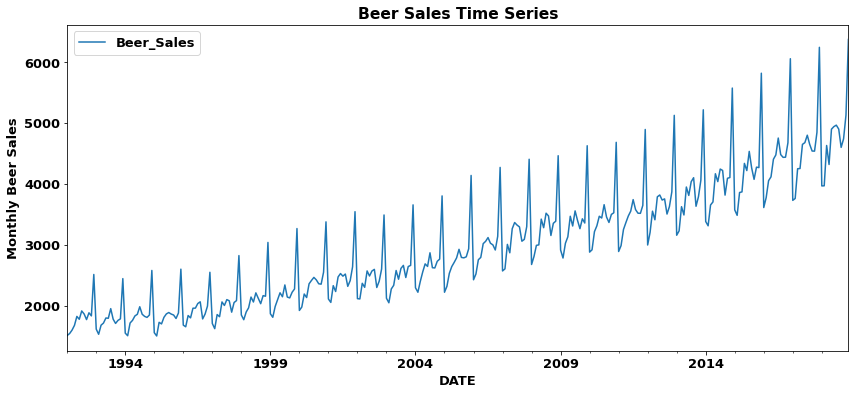

In [256]:
# Time Series Plot
data.plot(figsize=(14,6))
plt.xlabel('DATE',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold');
plt.title('Beer Sales Time Series',fontweight='bold')

In [257]:
# Test size: 12 months
test_size = 12
# Dataset is split into training and test data
train = data.iloc[:len(dataset)- test_size]
test = data.iloc[-test_size:]

In [258]:
# Scaling the training and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [259]:
# Importing the keras library and the TimeseriesGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [260]:
# Training Batch length
length = 11
# No. of features
n_features=1
# Creating the time series generator
time_series_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [280]:
# First batch of the time_series_generator- training and test values
InpSeq,TargetVal=time_series_generator[0]
# At the first batch, the generator takes the first 11 samples to predict the next sample
print(InpSeq,TargetVal)

[[[0.00168776]
  [0.00843882]
  [0.02025316]
  [0.03670886]
  [0.06772152]
  [0.05780591]
  [0.08670886]
  [0.07616034]
  [0.05675105]
  [0.08037975]
  [0.06962025]]] [[0.21308017]]


In [262]:
# The first batch samples are the first 11 values of the time series
scaled_train[:11]

array([[0.00168776],
       [0.00843882],
       [0.02025316],
       [0.03670886],
       [0.06772152],
       [0.05780591],
       [0.08670886],
       [0.07616034],
       [0.05675105],
       [0.08037975],
       [0.06962025]])

In [281]:
# The TargetVal of the time_series_generator first batch corresponds to the 12th [index 11] value of the scaled training data
print(TargetVal)
print(scaled_train[11])

[[0.21308017]]
[0.21308017]


LSTM Training

In [264]:
# Importing the necessary libraries to create/construct the deep neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras import initializers
import tensorflow as tf

In [265]:
# Use of random seed to get the same results at every run
tf.random.set_seed(0)
np.random.seed(0)

# Use of the he_uniform initializer to set the initial random weights of the model layers. 
initializer = tf.keras.initializers.he_uniform(seed=0)

# Initially, the network model is defined 
model = Sequential()

# Hidden layer neurons are chosen to be 11  which is equal to the defined length (number input samples per batch)
# Selected Activation function has been the rectified linear unit
model.add(LSTM(11, activation='relu', input_shape=(length, n_features),kernel_initializer=initializer))

# The output layer consists of 1 neuron with a 'linear' activation fuction 
model.add(Dense(1,activation='linear',kernel_initializer=initializer))
# The model is compiled using MSE as  loss function and Adam as optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')

# A validation generator is constructed in a similar way to the previous time_series_generator with the only difference being
# the use of scaled_test values for validation purposes
time_series_val_generator = TimeseriesGenerator(scaled_test,scaled_test, length=length, batch_size=1)

# The model is trained for 1000 epochs. At each epoch both training and validation losses can be observed
model.fit_generator(time_series_generator,epochs=1000,shuffle=False,
                    validation_data=time_series_val_generator) 
                  
                

Epoch 1/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0096 - val_loss: 0.1097
Epoch 2/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0113 - val_loss: 0.1030
Epoch 3/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0103 - val_loss: 0.1019
Epoch 4/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0099 - val_loss: 0.1022
Epoch 5/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0098 - val_loss: 0.1026
Epoch 6/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.1030
Epoch 7/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0097 - val_loss: 0.1032
Epoch 8/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0096 - val_loss: 0.1030
Epoch 9/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.1032
Epoch 10/1000
301/301 [==============================] - 1s 2ms/step - loss: 0.009

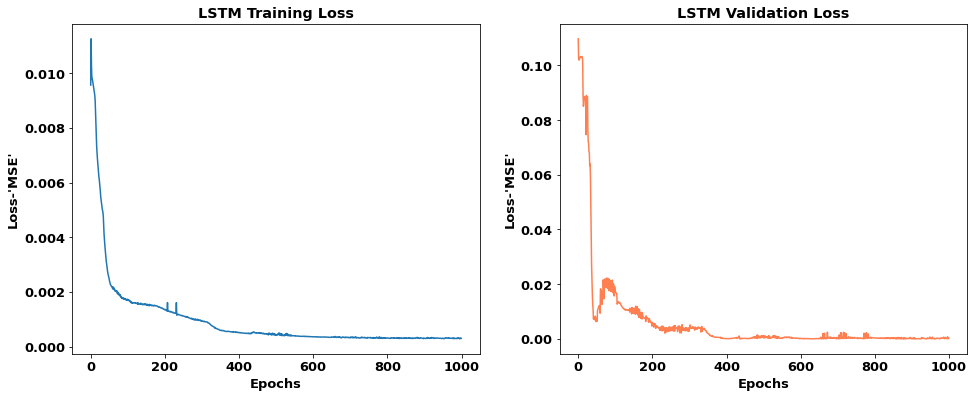

In [266]:
# Training and validation loss plots
fig,axs=plt.subplots(1,2,figsize=(14,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=12
train_loss = pd.DataFrame(model.history.history)
train_loss.loss.plot(ax=axs[0])
axs[0].set_title('LSTM Training Loss',fontweight='bold')
train_loss.val_loss.plot(ax=axs[1],color='coral')
axs[1].set_title('LSTM Validation Loss',fontweight='bold')
for ax in axs.flat:
    ax.set_xlabel('Epochs',fontweight='bold')
    ax.set_ylabel("Loss-'MSE'",fontweight='bold')

   
    ax.figure.tight_layout(pad=2)

LSTM Predictions on the Training Set

In [267]:
# Determining all LSTM outputs
training_outputs = []
batch = scaled_train[:length].reshape((1, length, n_features))

for i in range(len(scaled_train[length:])):
    train_out = model.predict(batch)[0]
    training_outputs.append(train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_train[length:][i]]],axis=1)

In [268]:
#Inverse transforming the expected values
actual_train=scaled_train[length:]
actual_train=scaler.inverse_transform(actual_train)

In [269]:
# Inverse transforming the LSTM predictions on the training set
train_predictions=scaler.inverse_transform(training_outputs)

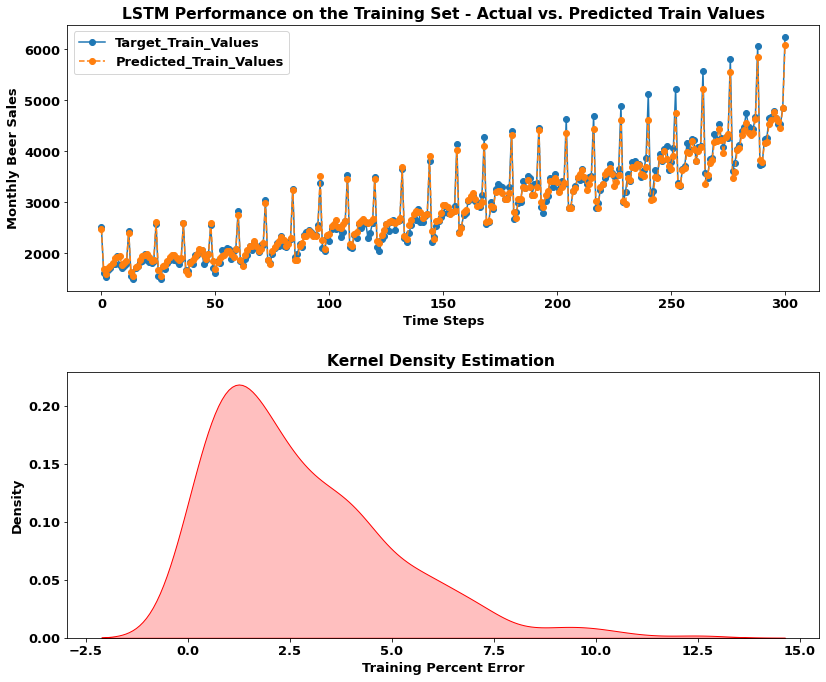

In [282]:
#'LSTM Performance on the training set - Actual vs. Predicted Values'
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

axs[0].plot(actual_train,marker='o',linestyle='-',label='Target_Train_Values')

axs[0].plot(train_predictions,marker='o',linestyle='dashed',label='Predicted_Train_Values')
axs[0].set_title('LSTM Performance on the Training Set - Actual vs. Predicted Train Values',fontweight='bold')

axs[0].legend()
axs[0].set_xlabel('Time Steps',fontweight='bold')
axs[0].set_ylabel('Monthly Beer Sales',fontweight='bold');

# Training percent error distribution plot
train_err=abs((actual_train-train_predictions)/actual_train)*100
train_err=pd.DataFrame(train_err,columns=['Training Error'])

sns.kdeplot(train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Training Percent Error',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

In [273]:
# Summary statistics of training percent error
train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,301.0,2.754704,2.208733,0.002539,1.070287,2.145353,3.974296,12.51877


LSTM Predictions on the Test Set

In [274]:
# Determining all LSTM outputs 
test_outputs = []
batch = scaled_train[-length:].reshape((1, length, n_features))

for i in range(len(test)):
    test_out = model.predict(batch)[0]
    test_outputs.append(test_out) 
    batch = np.append(batch[:,1:,:],[[test_out]],axis=1)

In [275]:
# Inverse transforming the LSTM predicitons
lstm_predictions = scaler.inverse_transform(test_outputs)

In [276]:
# A new test feature is created to comprise the LSTM test predictions
test['LSTM Predictions'] = lstm_predictions.round(2)

In [277]:
# test(Actual) and LSTM Predictions
test

,Beer_Sales,LSTM Predictions
DATE,,
2018-01-01,3965,3930.73
2018-02-01,3967,4003.73
2018-03-01,4629,4388.40
2018-04-01,4317,4436.15
2018-05-01,4897,4791.25
2018-06-01,4939,4886.47
2018-07-01,4963,4999.78
2018-08-01,4898,4917.79
2018-09-01,4598,4837.11


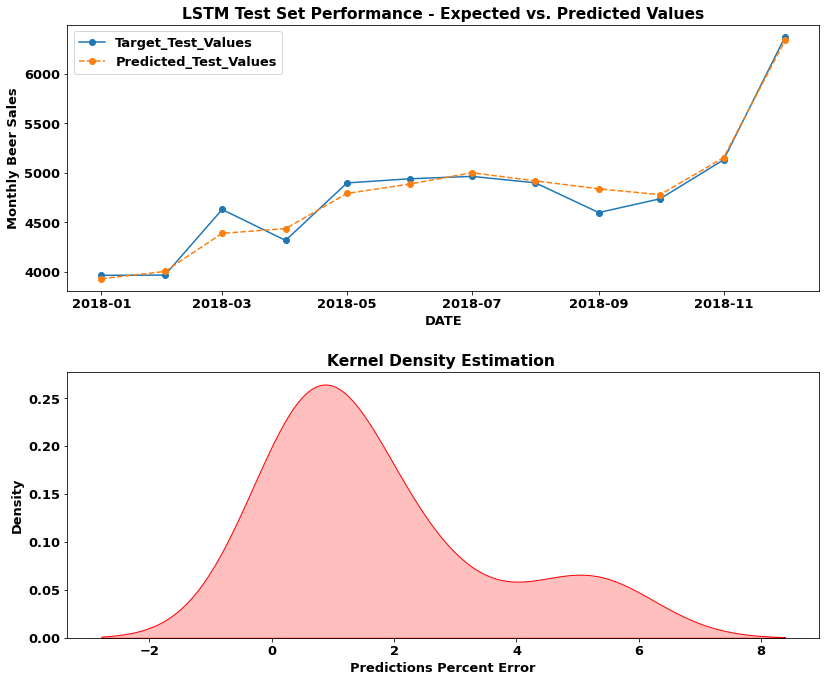

In [278]:
# Plot of the Test vs. Predicted values for a prediction horizon of 12 months 
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

axs[0].plot(test['Beer_Sales'],marker='o',linestyle='-',label='Target_Test_Values')

axs[0].plot(test['LSTM Predictions'],marker='o',linestyle='dashed',label='Predicted_Test_Values')
axs[0].set_title('LSTM Test Set Performance - Expected vs. Predicted Values',fontweight='bold')

axs[0].legend()
axs[0].set_xlabel('DATE',fontweight='bold')
axs[0].set_ylabel('Monthly Beer Sales',fontweight='bold');

# LSTM Predictions percent Error distribution plot
test_err=abs((test['Beer_Sales']-test['LSTM Predictions'])/test['Beer_Sales'])*100
test_err=pd.DataFrame(test_err,columns=['Test Set Error'])

sns.kdeplot(test_err['Test Set Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Predictions Percent Error',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

In [279]:
# Summary statistics of LSTM predictions percent error
test_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Test Set Error,12.0,1.766874,1.747986,0.404042,0.697924,0.900141,2.309619,5.200304


In [192]:
# Importing the metrics
from sklearn.metrics import mean_squared_error
# Root Mean Squared Error
print(np.sqrt(mean_squared_error(test['Beer_Sales'],test['LSTM Predictions'])))

112.18027322127536


In [171]:
# Creating an index for the LSTM predictions on the Training Set
train_index=pd.date_range(start='1992-12-01',periods=301,freq='M')

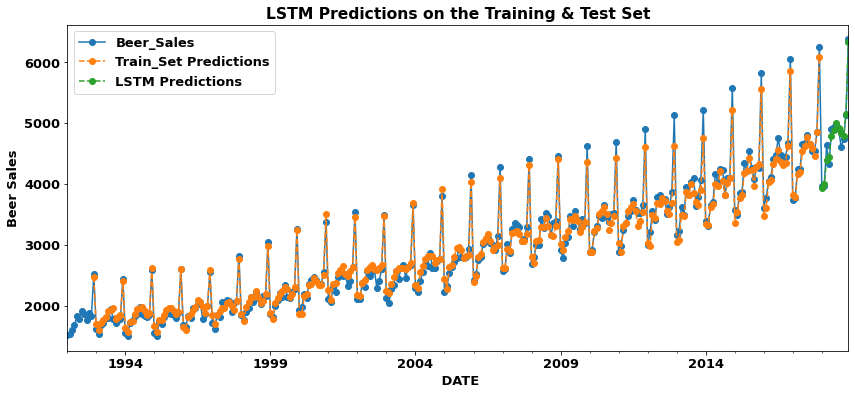

In [187]:
# Converting the train_predictions from np.ndarray to pandas dataframe
train_df=pd.DataFrame(data=train_predictions,index=train_index,columns=['Train_Set Predictions'])

# Plot comprising the original time series and the LSTM predictions on the Training and Test Set
ax=data.plot(figsize=(14,6),marker='o',linestyle='-')

train_df.plot(ax=ax,marker='o',linestyle='--',legend=True)
test['LSTM Predictions'].plot(ax=ax,legend=True,marker='o',linestyle='dashed')
plt.title('LSTM Predictions on the Training & Test Set',fontweight='bold')
plt.ylabel('Beer Sales',fontweight='bold')
plt.xlabel(' DATE',fontweight='bold');


Monthly Sales future forecast using LSTM

In [283]:
# The last 'Beer_Sales' record  has date index value equal to 2018-12-01
data.tail(3)

,Beer_Sales
DATE,
2018-10-01,4737
2018-11-01,5130
2018-12-01,6370


In [49]:
# A new scaler is being initialized
data_scaler=MinMaxScaler()
# fit_transform function applied to all dataset's entries
scaled_set=data_scaler.fit_transform(data)
# A new TimeseriesGenerator is created to include the new scaled values, (batch_size = 1 , length=12)
length=12
data_generator=TimeseriesGenerator(scaled_set,scaled_set,length=length,batch_size=1)



In [50]:
# Use of random seed to get the same results at every run
tf.random.set_seed(0)
np.random.seed(0)

# The LSTM model is constructed and compiled 
# Since the model forecasts into the future, in this case there is no presence of validation data 

initializer = tf.keras.initializers.he_uniform(seed=0)
model=Sequential()
model.add(LSTM(12,activation='relu',input_shape=(length,n_features),kernel_initializer=initializer))
                     
model.add(Dense(1,activation='linear',kernel_initializer=initializer))
                     
model.compile(optimizer=opt,loss='mse')

model.fit_generator(data_generator,epochs=1000,shuffle=False)

Epoch 1/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0082
Epoch 2/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0076
Epoch 3/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0061
Epoch 4/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 5/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 6/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0052
Epoch 7/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0051
Epoch 8/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 9/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 10/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 11/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 12/1000
312/312 [==============================] - 1s 2ms/step - loss: 0.0049
E

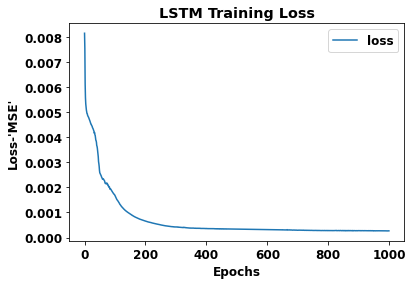

In [51]:
# Training Performance
loss=pd.DataFrame(model.history.history)
loss.plot()
plt.title('LSTM Training Loss',fontweight='bold')
plt.xlabel('Epochs',fontweight='bold')
plt.ylabel("Loss-'MSE'",fontweight='bold');

In [52]:
# Determining all LSTM predictions on the Training Set 
full_training_outputs = []
batch = scaled_set[:length].reshape((1, length, n_features))

for i in range(len(scaled_set[length:])):
    full_train_out = model.predict(batch)[0]
    full_training_outputs.append(full_train_out) 
    batch = np.append(batch[:,1:,:],[[scaled_set[length:][i]]],axis=1)

In [53]:
# Inverse transforming the actual training values
f_train=scaled_set[length:]
f_train=scaler.inverse_transform(f_train)

In [54]:
# Inverse transforming the LSTM predictions on the training set
f_train_predictions=scaler.inverse_transform(full_training_outputs)

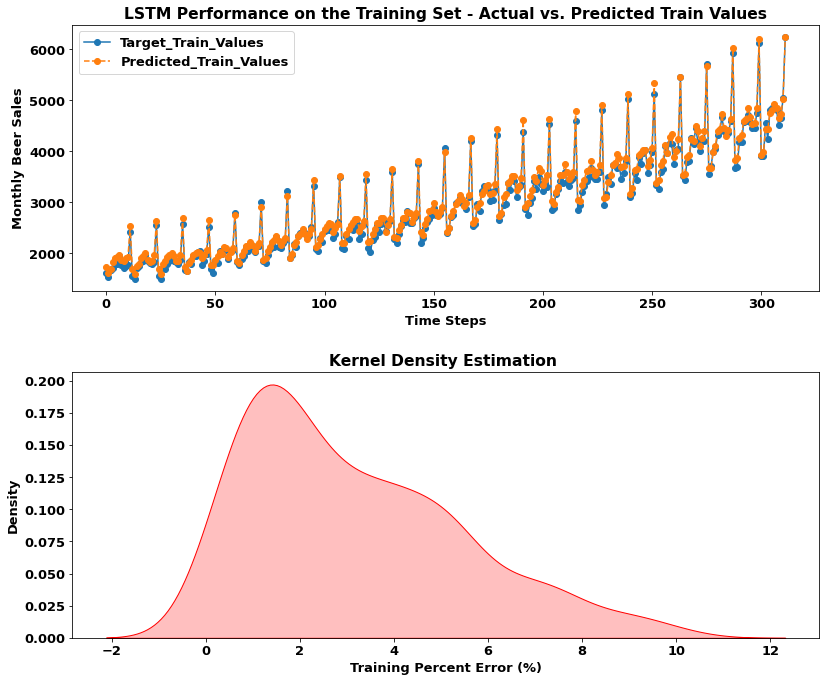

In [284]:
#'LSTM Training Performance - Actual vs. Predicted Training Values'
fig,axs=plt.subplots(2,1,figsize=(12,10))
plt.rcParams["font.weight"] = "bold"
plt.rcParams['font.size']=13

axs[0].plot(f_train,marker='o',linestyle='-',label='Target_Train_Values')

axs[0].plot(f_train_predictions,marker='o',linestyle='dashed',label='Predicted_Train_Values')
axs[0].set_title('LSTM Performance on the Training Set - Actual vs. Predicted Train Values',fontweight='bold')

axs[0].legend()
axs[0].set_xlabel('Time Steps',fontweight='bold')
axs[0].set_ylabel('Monthly Beer Sales',fontweight='bold');

# Training Percent Error distribution plot
f_train_err=abs((f_train-f_train_predictions)/f_train)*100
f_train_err=pd.DataFrame(f_train_err,columns=['Training Error'])

sns.kdeplot(f_train_err['Training Error'],shade=True,color='r',kernel='gau',ax=axs[1])
axs[1].set_xlabel('Training Percent Error (%)',fontweight='bold')
axs[1].set_ylabel('Density',fontweight='bold');
axs[1].set_title('Kernel Density Estimation ',fontweight='bold')
for ax in axs.flat:
    ax.figure.tight_layout(pad=2);

In [57]:
# Summary statistics of the LSTM Prediction Error with respect to its Training Set Perfomance
f_train_err.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Training Error,312.0,3.170989,2.295891,0.067377,1.321295,2.660613,4.756536,10.131167


In [58]:
# Mean Squared Error
print(np.sqrt(mean_squared_error(f_train,f_train_predictions)))

105.07447674304666


In [59]:
# Creating an index for the LSTM predictions on the Training Set
f_train_index=pd.date_range(start='1993-01-01',periods=312,freq='M')

In [60]:
# Converting the LSTM predictions from np.ndarray to pandas dataframe
f_train_df=pd.DataFrame(data=f_train_predictions,index=f_train_index,columns=['Predicted_Train'])

In [61]:
# Obtaining the LSTM forecasted values 
lstm_outputs=[]
batch = scaled_set[-length:].reshape((1, length, n_features))

for i in range(length):
    lstm_out = model.predict(batch)[0]
    lstm_outputs.append(lstm_out) 
    batch = np.append(batch[:,1:,:],[[lstm_out]],axis=1)

In [62]:
# Inverse transforming the LSTM forecasts
lstm_outputs=data_scaler.inverse_transform(lstm_outputs)
lstm_outputs

array([[4216.99666613],
       [4290.95709217],
       [4836.59266436],
       [4711.37272102],
       [5168.07480389],
       [5119.80740339],
       [5216.81844723],
       [5169.02003419],
       [4855.25378007],
       [5011.28875375],
       [5341.63934493],
       [6696.93940389]])

In [63]:
# Creating an index for the LSTM forecasts
lstm_forecast_index=pd.date_range(start='2019-01-01',periods=12,freq='M')

In [64]:
# Converting the lstm_outputs from np.ndarray to pandas dataframe
lstm_forecast_df=pd.DataFrame(data=lstm_outputs,index=lstm_forecast_index,columns=['LSTM Forecasts'])
lstm_forecast_df

,LSTM Forecasts
2019-01-31,4216.996666
2019-02-28,4290.957092
2019-03-31,4836.592664
2019-04-30,4711.372721
2019-05-31,5168.074804
2019-06-30,5119.807403
2019-07-31,5216.818447
2019-08-31,5169.020034
2019-09-30,4855.253780
2019-10-31,5011.288754


Text(0.5, 0, ' DATE')

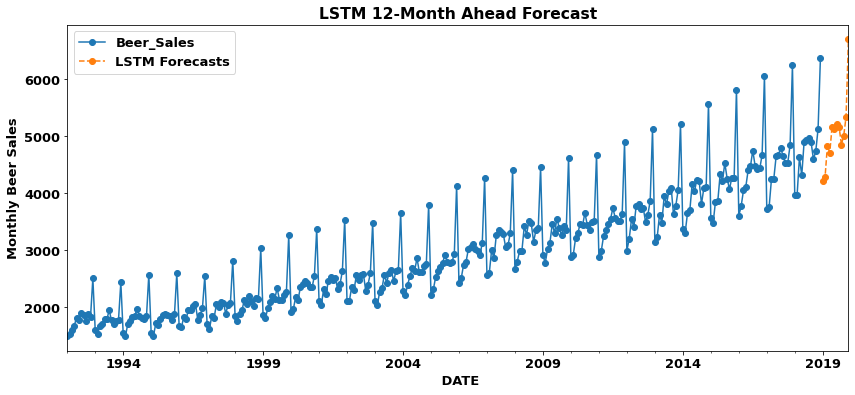

In [209]:
# Plot comprising the original time series,and the 12-month LSTM forecasts

ax=data.plot(figsize=(14,6),marker='o',linestyle='-')
lstm_forecast_df.plot(ax=ax,marker='o',linestyle='--')
plt.title('LSTM 12-Month Ahead Forecast',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.xlabel(' DATE',fontweight='bold')

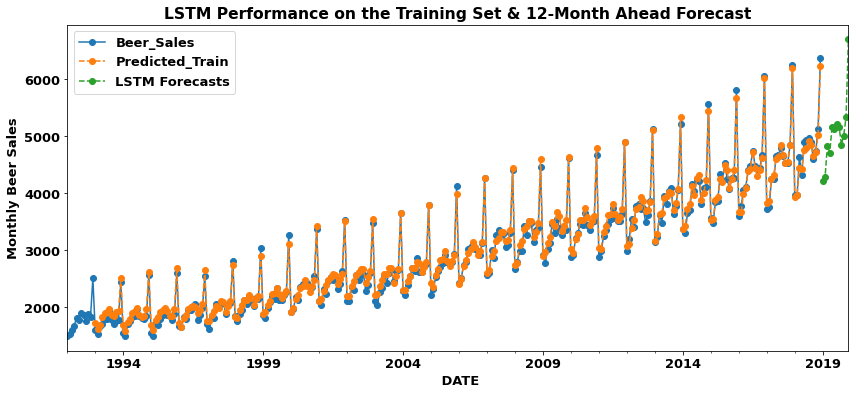

In [285]:
# Plot comprising the LSTM performance on the training set along with the 12-month ahead forecasts
ax=data.plot(figsize=(14,6),marker='o',linestyle='-')
f_train_df.plot(ax=ax,marker='o',linestyle='dashed')
lstm_forecast_df.plot(ax=ax,marker='o',linestyle='--')
plt.title('LSTM Performance on the Training Set & 12-Month Ahead Forecast',fontweight='bold')
plt.ylabel('Monthly Beer Sales',fontweight='bold')
plt.xlabel(' DATE',fontweight='bold');